In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score,classification_report

In [108]:
data = pd.read_csv('iris.csv')  # load CSV file

In [109]:
data.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [110]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [111]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [112]:
data.duplicated().sum()    #there are three data is duplicate so it need to be delete

np.int64(3)

In [113]:
data.drop_duplicates(inplace=True)  # inplace is beacause it will not create another dataset it will do change in existing dataset

In [114]:
data.duplicated().sum()

np.int64(0)

In [126]:
data.describe()  # data Has no any outliers

,sepal_length,sepal_width,petal_length,petal_width,species
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,5.856463,3.055782,3.780272,1.208844,1.006803
std,0.829100,0.437009,1.759111,0.757874,0.815069
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


# Encoding

In [115]:
# Converting them into int (0,1,2)
new_species = [['setosa', 'versicolor', 'virginica']]
o_e = OrdinalEncoder(categories=new_species)
data['species'] = o_e.fit_transform(data[['species']])

# Data Spliting

In [116]:
x = data.drop('species',axis=1)  # droping column because it is dependent varible
y = data['species']   # this is dependent variable

In [117]:
y.value_counts()  # data is Balanced

species
1.0    50
2.0    49
0.0    48
Name: count, dtype: int64

In [118]:
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# Model Training

In [119]:
model = LogisticRegression(multi_class='multinomial')   # if feature will be two  (1,0) than it will auto select ovr
model.fit(X_train,Y_train)                              # if featutre will be multiple it will select multinomial

c:\Users\ADMIN\anaconda3\envs\bia\lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

# Model Evalution

In [120]:
Y_pred = model.predict(X_test)
Y_pred

array([2., 1., 2., 0., 1., 0., 1., 0., 2., 0., 0., 1., 2., 1., 2., 1., 0.,
       1., 2., 0., 0., 2., 0., 2., 1., 0., 1., 2., 1., 0.])

In [121]:
model.predict([[4.6,3.1,1.5	,0.2]])

c:\Users\ADMIN\anaconda3\envs\bia\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0.])

In [122]:
accuracy = accuracy_score(Y_test,Y_pred)*100
accuracy

93.33333333333333

In [123]:
confusion = confusion_matrix(Y_test,Y_pred)
confusion

array([[11,  0,  0],
       [ 0,  9,  1],
       [ 0,  1,  8]])

In [124]:
report = classification_report(Y_test,Y_pred)
print(report)

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        11
         1.0       0.90      0.90      0.90        10
         2.0       0.89      0.89      0.89         9

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30



# Visulization Of Confusion Metrix

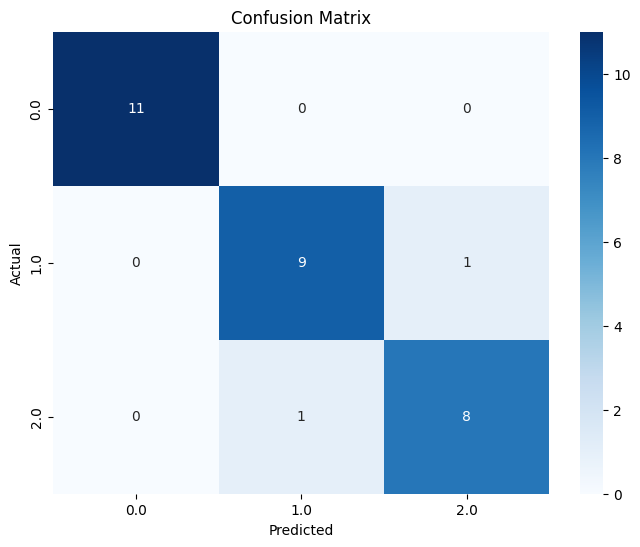

In [125]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, cmap='Blues', fmt='d', xticklabels=data["species"].unique(),
            yticklabels=data["species"].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()